# PROJECT INTRODUCTION

Project Inspiration: [Absent Data](https://www.youtube.com/watch?v=iwUli5gIcU0)

This project utilizes K-Means clustering to perform customer segmentation on a dataset containing information about the customers of a mall.

### Project Outline
1. Exploratory Data Analysis
2. K-Means Clustering
3. Cluster Analysis
4. Observations & Business Recommendations

**Data Source: [Mall_Customers.csv](https://github.com/stevenjacoballen/Mall_Customer_Segmentation/blob/main/Mall_Customers.csv)**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# 1. EXPLORATORY DATA ANALYSIS

Read in the data.

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Review df for missing values and review data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is no mising information and the data types all appear to be appropriate.

Review summary statistics.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The mean `Age` is 39, ranging from 18-70.    
The mean `Annual Income` is 61K, ranging from 15k - 137k.    
The mean `Spending Score (1-100)` is 50, ranging from 1 - 99.     
<br>
<br>
Let's take a look at each feature.

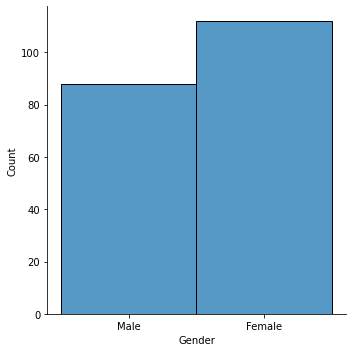

In [5]:
sns.displot(df['Gender'])

In [6]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

As this dataset relates to  mall shoppers, it is not entirely surprising to see that the dataset contains more records from female shoppers than male shoppers as men tend shop somewhat less than women, in general. In this dataset, the sample population is 56% Female and 44% male.

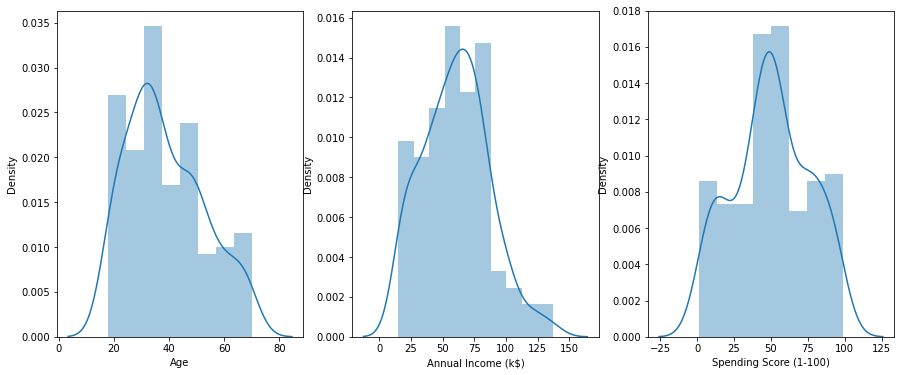

In [7]:
plt.figure(1, figsize=(15,6))
n=0
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(df[i], kde=True)

plt.show()

`Age` and `Annual Income` distributions follow intuition and indicate that the mall does a good job at servicing their target population (ie - customers that are in their prime shopping years are largely middle-class).   <br>

`Age` Most shoppers would be somewhere between 20 and 60.   
`Annual Income` Most people make \$75k or less, with a sharp decrease in higher earners after.  
`Spending Score (1-100)` The tri-modal nature is surprising, at least with respect to the relatively large amount of very poor spending scores. The large amount of very high spending scores is not surprising as it makes sense that the shoppers with the best scores are going to be extremely loyal patrons who frequent the mall more so than the norm, participate in loyalty programs, etc. As this dataset is rather small (200 records), I would be curious to see if this tri-modal nature would change with a larger sample size. 

We can use a `pairplot` to get a visual representation of any potential relationships found within the data.
As customer ID is not a meaningful attribute about the shoppers, it will be removed.

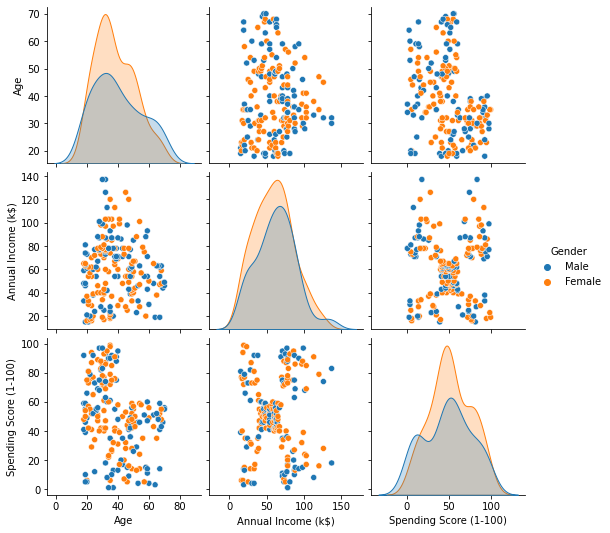

In [8]:
df = df.drop(columns = ['CustomerID'], axis = 1)
sns.pairplot(df, hue = 'Gender')

The blue and orange dots represent males and females, respectively. There is no distinct clustering of either sex in any plot. 

Distinct clustering can be seen in the plot `Annual Income` vs `Spending Score`, which will be explored below.
There also appears to be clustering when plotting `Age` vs `Spending Score`, but for the purposes of this project, this relationship will not be investigated further.

As can be seen in the 'middle diagonal', the features (very loosely) follow a similar distribution between males and females.  
`Age` It appears that males tend to shop at malls earlier and later in life than females.  
`Annual Income` It appears that the female shoppers have higher incomes than males in their 20's -30's, and while both experience a steep decline in earning salaries above ~$75k, there does seem to be a portion of the male population that earns more than the highest earning females.   
`Spending Score` It appears that males tend to have worse spending scores than females, in general. Males have the lowest spending scores, as seen on the left-tail, and have a much weaker "loyalty bump" that can be seen in the female population's right-tail. 

All thigs considered, it does appear that the mean `Age`, `Annual Income`, and `Spending Score` between males and females are nearly identitical. Let's review the the mean values and then determine if any differences are statistically significant by running a t-test on each feature.

<br>

### Hypothesis Testing (t-test)

In [9]:
# Display mean Age, Income, and Spending Score for males and females.

df.groupby('Gender')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [10]:
# Run Gender-based t-tests for Age, Annual Income, and Spending Score, saving the results to variables.
# Then print the results.

from scipy import stats as st

# t-test for Age
m = df.loc[df['Gender'] == 'Male', 'Age'].to_numpy()
f = df.loc[df['Gender'] == 'Female', 'Age'].to_numpy()

age_t = st.ttest_ind(m, f).statistic
age_p = st.ttest_ind(m, f).pvalue



# t-test for Annual Income
m = df.loc[df['Gender'] == 'Male', 'Annual Income (k$)'].to_numpy()
f = df.loc[df['Gender'] == 'Female', 'Annual Income (k$)'].to_numpy()

income_t = st.ttest_ind(m, f).statistic
income_p = st.ttest_ind(m, f).pvalue



# t-test for Spending Score
m = df.loc[df['Gender'] == 'Male', 'Spending Score (1-100)'].to_numpy()
f = df.loc[df['Gender'] == 'Female', 'Spending Score (1-100)'].to_numpy()

spending_t = st.ttest_ind(m, f).statistic
spending_p = st.ttest_ind(m, f).pvalue



# Print the results.
data = [
    ['Age', age_t, age_p],
    ['Annual Income (k$)', income_t, income_p],
    ['Spending Score (1-100)', spending_t, spending_p]]
    

df_summary = pd.DataFrame(data=data, columns= ['Feature ','t-statistic', 'p-value'])
df_summary

,Feature,t-statistic,p-value
0,Age,0.858071,0.391891
1,Annual Income (k$),0.795022,0.427552
2,Spending Score (1-100),-0.819046,0.413745


With p-values well above .005 for each test, we cannot reject any of the null hypotheses, meaning that the mean values for `Age`, `Annual Income`, and `Spending Score` between males and females do not show statistically significant differences.  

Additional support for not rejecting the null hypotheses can be found in the small t-statistic scores. The t-statistic is a ratio between the difference between two groups and the difference within the groups. In other words, the larger the t-statistic, the larger the difference between groups. Conversely, the smaller the t-statistic, the smaller the difference. 

# 2. K-MEANS CLUSTERING



One of the requirements of implementing K-Means clustering is specifying the number of clusters. Although we can visually see five distinct clusters when plotting `Annual Income` against `Spending Score`, this is not always the case and other means of finding the optimal number of clusters need to be utilized. 

One such method is known as the 'Elbow Method'.  
The Elbow method works by running the K-Means algorithm through a loop, with each iteration trying different `n` number of clusters. At the end of each iteration, the inertia, or WCSS (Within Cluster Sum of Squares) is recorded into an array. Inertia/WCSS is the sum of squared distance between each point and the centroid in a cluster. After the loop ends, the Inertia & n_clusters data points are plotted, as shown below. 

As you can see below, the plot looks a bit like an arm with an elbow.

With each in increase in `n_clusters`, WCSS decreases. Initially, WCSS decreases sharply with each increase in `n_clusters`, but eventually the decreases in WCSS reach negligible levels. The point at which the decreases in WCSS start to 'flatten out' is called the 'elbow'. The `n_clusters` value at the elbow represents the most optimal number of clusters.   

Recall the `pairplot` above. It appears that plotting `Annual Income` against `Spending Score` results in five distinct clusters. Let's see if this can be confirmed with the Elbow method. 

Text(0, 0.5, 'WCSS')

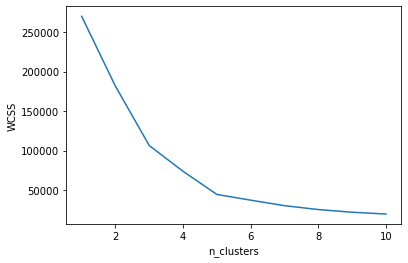

In [11]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel("n_clusters")
plt.ylabel("WCSS")


Success! The Elbow method has confirmed what is shown in the `pairplot`.  
If you were to imagine the blue line above as an arm, the 'elbow' would be at 5 `n_clusters`.

Now that we know the optimal number of clusters, let's fit the K-Means algorithm to `Annual Income` and `Spending Score`, and then add a new column to the df indicating which cluster each record belongs to.

In [12]:
clustering = KMeans(n_clusters = 5)
clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Income and Spending Cluster']=clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income and Spending Cluster
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


With each record now belonging to a specific cluster, we can now plot `Annual Income` against `Spending Score` and can color each data point in accordance with its cluster number.

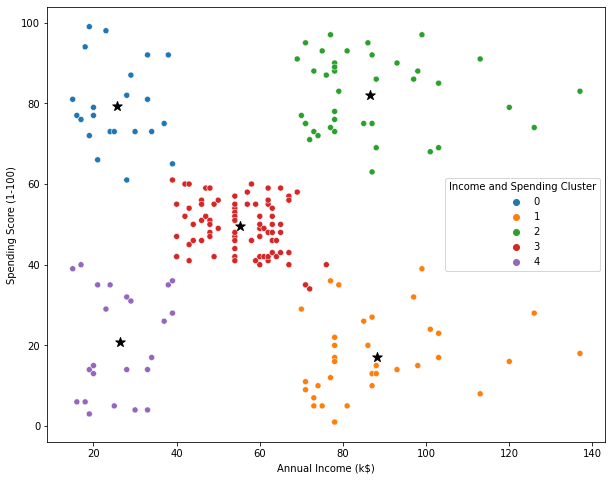

In [13]:
centers = pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['x', 'y']

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Income and Spending Cluster', palette = 'tab10')
plt.scatter(x=centers.x, y=centers.y, s=100, c='black', marker='*')

As can be seen above, the Elbow method did a great job at finding the optimal number of clusters to fit the data to!  
<br>

Since each cluster represents a different group of shoppers, we can evaluate each cluster and develop strategies for the mall's management to improve the business. This can include identifying problem-clusters, developing highly targeted marketing campaigns for each cluster, identifying gaps/opportunities in under-served customers, and more. 

Let's gather some data about each cluster and conclude with a final set of observations and recommendations.

# 3. CLUSTER ANALYSIS

Quantify the number of shoppers in each cluster.

In [14]:
df['Income and Spending Cluster'].value_counts()

3    81
2    39
1    35
4    23
0    22
Name: Income and Spending Cluster, dtype: int64

Obtain the male/female percentage breakdown of each cluster.

In [15]:
pd.crosstab(df['Income and Spending Cluster'], df['Gender'], normalize='index')


Gender,Female,Male
Income and Spending Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.538462,0.461538
3,0.592593,0.407407
4,0.608696,0.391304


Display the mean `Age`, `Annual Income`, and `Spending Score` for each cluster.

In [16]:
df.groupby('Income and Spending Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


Summarize the above data into a df.

In [17]:
data = [
    ['Red', 'Female', 'Oldest (45)', 'Lower (26K)', 'Bad Spender (21)', ''],
    ['Green', 'Female', 'Older (43)', 'Middle (55K)', 'Consistent Spender (50)', 'largest Customer Segment: 2X-4X all others'],
    ['Orange', 'Male', 'Middle (41)', 'Highest (88K)', 'Worst Spender (17)', 'Only Male Dominated Segment'],
    ['Blue', 'Female', 'Younger (33)', 'High (87K)', 'Best Spender (82)', ''],
    ['Purple', 'Female', 'Youngest (25)', 'Lowest (26k)', 'Good Spender (79)', '']

]

df_summary = pd.DataFrame(data=data, columns= ['Color', 'Dominant Gender', 'Age Group(mean age)', 'Income Group(mean income)', 'Spending Group(mean score)', 'Notable Items'])
df_summary

,Color,Dominant Gender,Age Group(mean age),Income Group(mean income),Spending Group(mean score),Notable Items
0,Red,Female,Oldest (45),Lower (26K),Bad Spender (21),
1,Green,Female,Older (43),Middle (55K),Consistent Spender (50),largest Customer Segment: 2X-4X all others
2,Orange,Male,Middle (41),Highest (88K),Worst Spender (17),Only Male Dominated Segment
3,Blue,Female,Younger (33),High (87K),Best Spender (82),
4,Purple,Female,Youngest (25),Lowest (26k),Good Spender (79),


# 4. CONCLUSION

### Observations

- There are five types of shoppers.  
- All segments, except one (orange), have more females than males.  
  - That said, the male customer base CANNOT be ignored. The WORST split is 61% female and 39% male. Males make up nearly half of the customer base.
- Customer base is mostly middle-aged (about 70% with mean ages ranging from 41-45 years old).  
- The two youngest segments have much wider age gaps, 33 and 25 years old, respectively. 
- Only 40% of the customer base 'lives' in 'the middle' (Green Cluster: middle income range and middle spending scores).
- This means that 60% of the customer base is on the fringe (high/low income, high/low spending scores).
- The youngest customers have the best spending scores.

### Business Recommendations

<br>
1. Keep the two youngest segments happy (purple and blue). Even though they consist of the lowest (and nearly the highest) earners, they both have the highest spending scores.
<br><br>
2. Do not lose sight of the green segment, however. They are largest, most consistent customer segment. Research ways to increase this segment's Spending Score. There is large potential here.
<br><br>
3. Research the orange segment. Why is it male dominated? This segment only makes an average of \$1k more than the next wealthiest group, so it is unlikely that it is strictly due to income. Also Research ways to increase the spending score in this segment as this is the wealthiest (and only male dominated) segment.
<br><br>
4. Monitor red segment. Making up 11% of the customer base, they are oldest, 2nd lowest earning, and 2nd worst spending segment. This segment is at the end of their customer life cycle. Ensure that this segment is still profitable for the business. If not, consider how exiting this segment entirely and re-investing into the remaining segments.
